In [15]:
import cv2
import numpy as np
from keras.models import Model
from keras.models import load_model
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from keras.layers import Input
import matplotlib.pyplot as plt

In [12]:
c_a_e = load_model('../face_generator/final50_cnn_checkpoint.tf/')
c_a_e.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 8)         1160      
_________________________________________________________________
flatten (Flatten)            (None, 3528)              0         
_________________________________________________________________
dense (Dense)                (None, 30)               

In [13]:
encoder_input = Input(shape=(50,50,3))
enc_layer = c_a_e.layers[1](encoder_input)

for i in range(2, 7):
    enc_layer = c_a_e.layers[i](enc_layer)
encoder = Model(inputs=encoder_input, outputs=enc_layer)
encoder.summary()

Model: "functional_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 8)         1160      
_________________________________________________________________
flatten (Flatten)            (None, 3528)              0         
_________________________________________________________________
dense (Dense)                (None, 30)               

In [68]:
first_image_path = "../face_generator/celebA/img_align_celeba/img_align_celeba/000300.jpg"
second_image_path = "../face_generator/celebA/img_align_celeba/img_align_celeba/000001.jpg"

(1, 50, 50, 3) (1, 50, 50, 3)


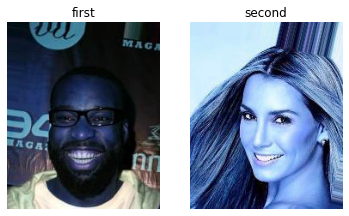

In [69]:
first_image = cv2.imread(first_image_path,cv2.IMREAD_COLOR)
second_image = cv2.imread(second_image_path,cv2.IMREAD_COLOR)
face1 = cv2.resize(first_image, (50,50))
face2 = cv2.resize(second_image, (50,50))
face1 = np.expand_dims(face1,axis=0)
face2 = np.expand_dims(face2,axis=0)
print(face1.shape,face2.shape)

plt.figure()
plt.subplot(1,2,1)
plt.title('first')
plt.axis('off')
plt.imshow(first_image)

plt.subplot(1,2,2)
plt.title('second')
plt.axis('off')
plt.imshow(second_image)

In [70]:
pred1 = encoder.predict(face1)
pred2 = encoder.predict(face2)
print(pred1.shape,pred2.shape)

(1, 30) (1, 30)


In [71]:
import numpy as np
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))    

In [73]:
import scipy.spatial.distance as distance
c = 1 - distance.cosine(pred1, pred2)
print(c)

0.5596322417259216
